In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15339, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15339 (delta 1), reused 7 (delta 1), pack-reused 15331
Receiving objects: 100% (15339/15339), 13.93 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (10379/10379), done.


In [2]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

!/usr/local/cuda/bin/nvcc --version

/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [4]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-10-30 14:35:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  62.3MB/s    in 4.1s    

2021-10-30 14:35:20 (58.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')  # connect to my google drive

/content
Mounted at /content/gdrive


In [7]:
!cp /content/gdrive/MyDrive/3710/valid.zip /content/darknet/data/

In [9]:
!cp /content/gdrive/MyDrive/3710/test.zip /content/darknet/data/

In [10]:
!unzip /content/darknet/data/valid.zip -d /content/darknet/data/

Archive:  /content/darknet/data/valid.zip
   creating: /content/darknet/data/isic_test/
  inflating: /content/darknet/data/isic_test/ISIC_0000007.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000013.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000022.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000027.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000028.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000039.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000045.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000046.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000050.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000061.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000062.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000064.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000065.jpg  
  inflating: /content/darknet/data/isic_test/ISIC_0000069.jpg  
  inflating: /co

In [11]:
!unzip /content/darknet/data/test.zip -d /content/darknet/data/

Archive:  /content/darknet/data/test.zip
   creating: /content/darknet/data/test1/
  inflating: /content/darknet/data/test1/ISIC_0012086.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012086.txt  
  inflating: /content/darknet/data/test1/ISIC_0012136.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012136.txt  
  inflating: /content/darknet/data/test1/ISIC_0012147.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012147.txt  
  inflating: /content/darknet/data/test1/ISIC_0012152.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012152.txt  
  inflating: /content/darknet/data/test1/ISIC_0012178.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012178.txt  
  inflating: /content/darknet/data/test1/ISIC_0012199.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012199.txt  
  inflating: /content/darknet/data/test1/ISIC_0012223.jpg  
  inflating: /content/darknet/data/test1/ISIC_0012223.txt  
  inflating: /content/darknet/data/test1/ISIC_0012248.jpg  
  inflating: /con

In [14]:
import os
def test_path():
  image_files = []
  os.chdir(os.path.join("/content/darknet/data", "test"))
  for filename in os.listdir(os.getcwd()):
      if filename.endswith(".jpg"):
          image_files.append("/content/darknet/data/test/" + filename)
  os.chdir("..")
  with open("test.txt", "w") as outfile:
      for image in image_files:
          outfile.write(image)
          outfile.write("\n")
      outfile.close()
  os.chdir("..")

In [15]:
test_path()

In [16]:
!cp /content/gdrive/MyDrive/3710/obj.name /content/darknet/data
!cp /content/gdrive/MyDrive/3710/obj.data /content/darknet/data
!cp /content/gdrive/MyDrive/3710/yolov3_custom_3710.cfg /content/darknet/cfg

In [18]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-10-30 14:47:40--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  55.9MB/s    in 2.8s    

2021-10-30 14:47:43 (55.9 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



[Errno 20] Not a directory: 'darknet'
/content
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  1

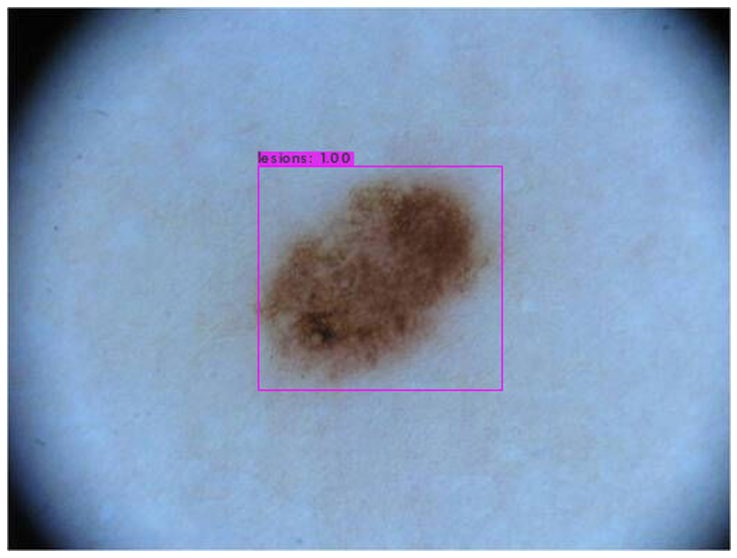

In [20]:
%cd darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights /content/darknet/data/valid/ISIC_0000007.jpg -thresh 0.8
imShow('predictions.jpg')

[Errno 20] Not a directory: 'darknet'
/content
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  1

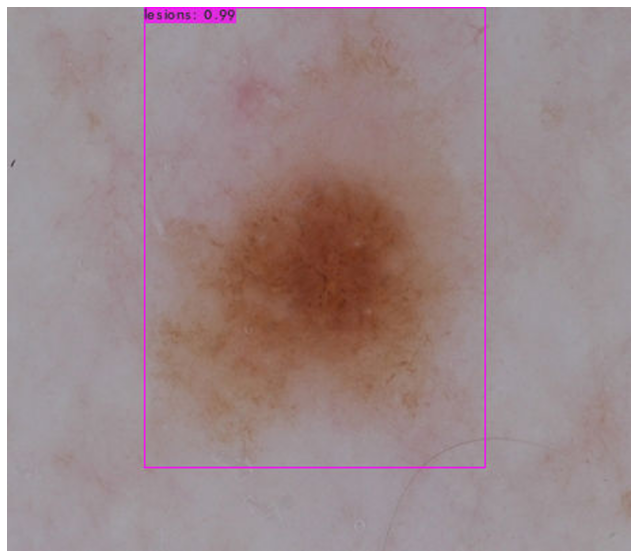

In [21]:
%cd darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights /content/darknet/data/valid/ISIC_0000489.jpg -thresh 0.8
imShow('predictions.jpg')

[Errno 20] Not a directory: 'darknet'
/content
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  1

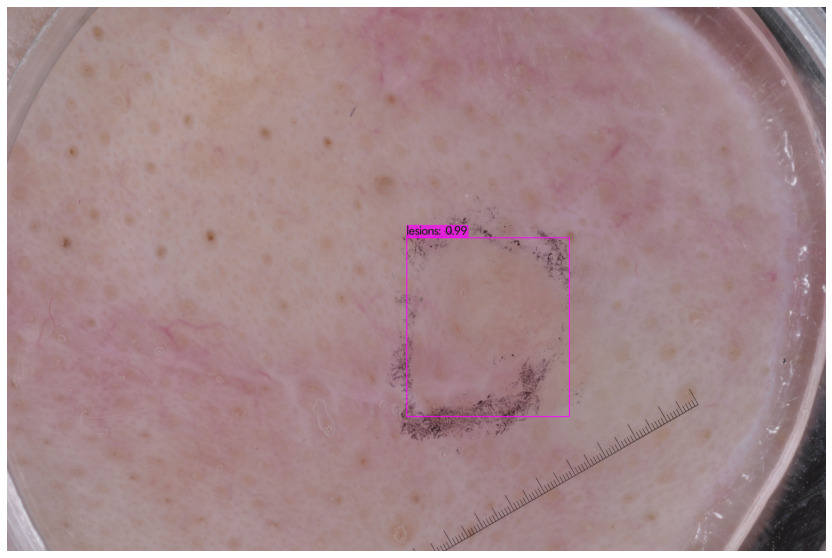

In [26]:
%cd darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights /content/darknet/data/test/ISIC_0012258.jpg -thresh 0.8
imShow('predictions.jpg')

[Errno 20] Not a directory: 'darknet'
/content
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  1

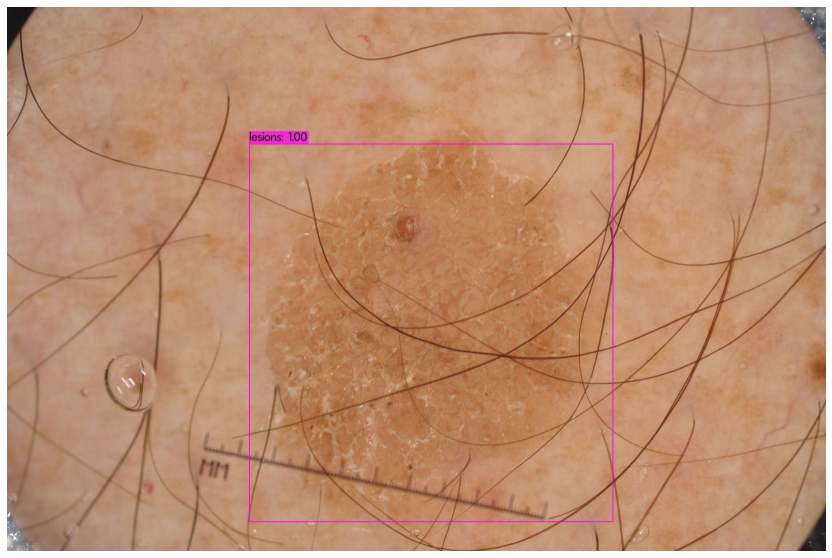

In [28]:
%cd darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights /content/darknet/data/test/ISIC_0014386.jpg -thresh 0.8
imShow('predictions.jpg')

In [22]:
!./darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights -ext_output -dont_show </content/darknet/data/test.txt> map.txt -iou_thresh 0.8

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 

In [23]:
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights -ext_output -dont_show </content/darknet/data/test.txt> result.txt -iou_thresh 0.8

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 

In [25]:
!./darknet detector recall /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_3710.cfg /content/gdrive/MyDrive/3710/backup/yolov3_custom_last.weights -ext_output -dont_show </content/darknet/data/test.txt> recall.txt -iou_thresh 0.8

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 